# MIT License
Copyright (c) 2022 Karan Raman Agrawal, Sanika Patne

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Dataset Description
For this project we will be using the “UrbanSound8k” dataset, which is publicly available for academic use.

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. The audio files are in ".wav" format. 

The samples are around 4 seconds in length. 

Each sound sample is labeled with the class to which it belongs. After downloading the dataset, we see that it consists of two parts:

- Audio files in the ‘audio’ folder: It has 10 sub-folders named ‘fold1’ through ‘fold10’. Each sub-folder contains a number of ‘.wav’ audio samples eg. ‘fold1/103074–7–1–0.wav’

- Metadata in the ‘metadata’ folder: It has a file ‘UrbanSound8K.csv’ that contains information about each audio sample in the dataset such as its filename, its class label, the ‘fold’ sub-folder location, and so on. The class label is a numeric Class ID from 0–9 for each of the 10 classes. eg. The number 0 means air conditioner, 1 is a car horn, and so on. 


In [1]:
# Importing all necessary libraries for this execution
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Let's read a sample audio using librosa
audio_file_path = (
    r"C:\Users\Karan\Desktop\DSMT\Final-Project\UrbanSound8K\audio\fold2\4201-3-0-0.wav"
)
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [3]:
# Sample Check
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.07455782 -0.07427226
  0.        ]


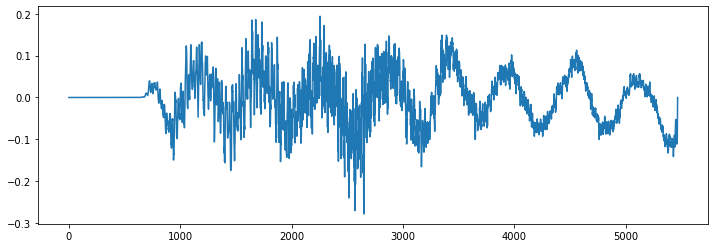

In [4]:
# Visual representation of uudio wave
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [5]:
# Reading audio wave and sampling rate
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [6]:
# Sample Check
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2357, -2032],
       [-2327, -2161],
       [-2596, -2295]], dtype=int16)

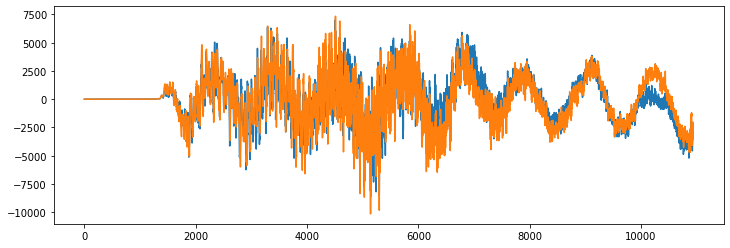

In [7]:
# Visual Representation of Audio
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [8]:
# Sample Check on MFCC's(mel frequency cepstral coefficients) extraction
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=80)
print(mfccs.shape)

(80, 11)


In [9]:
# Sample Check Mel-Spectrograms
mfccs

array([[-5.56303589e+02, -2.93282715e+02, -1.90003784e+02,
        -1.52674576e+02, -1.39339737e+02, -1.42487640e+02,
        -1.60361038e+02, -1.89350449e+02, -2.17289413e+02,
        -2.33068604e+02, -2.31071579e+02],
       [ 1.26368637e+02,  1.35372223e+02,  1.25179581e+02,
         1.03865891e+02,  8.84239883e+01,  9.06229477e+01,
         9.16858139e+01,  8.85056534e+01,  8.18104935e+01,
         8.22542267e+01,  9.05853729e+01],
       [ 2.35947342e+01,  1.10411358e+01, -1.48624492e+00,
        -1.43112297e+01, -1.40572071e+01, -7.05646813e-01,
         2.02099800e+00,  4.87855339e+00,  2.10169244e+00,
         8.12417126e+00,  9.49576759e+00],
       [-3.15871811e+00, -5.06422710e+00, -2.36067080e+00,
         5.87041378e+00,  1.15253983e+01,  1.14624043e+01,
         1.19005814e+01,  1.36548061e+01,  1.77582092e+01,
         1.62269630e+01,  1.18628645e+01],
       [-8.03226089e+00, -1.89570522e+01, -2.23668671e+01,
        -3.20293503e+01, -4.68006134e+01, -5.48897552e+01,
  

In [10]:
# Reading Metadata of Audio Files
audio_dataset_path = r"C:\Users\Karan\Desktop\DSMT\Final-Project\UrbanSound8K\audio"
metadata = pd.read_csv(
    r"C:\Users\Karan\Desktop\DSMT\Final-Project\UrbanSound8K\metadata\UrbanSound8K.csv"
)
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
# Function to extract MFCC's of all Audio Waves in Dataset
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [12]:
# Extraction of MFCC's of all Audio Waves
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        "fold" + str(row["fold"]) + "/",
        str(row["slice_file_name"]),
    )
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3555it [06:53,  8.59it/s]C:\Users\Karan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [15:17, 13.00it/s]C:\Users\Karan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8327it [15:17, 16.27it/s]C:\Users\Karan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [15:59,  9.10it/s]


In [13]:
# converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=["feature", "class"])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [14]:
# Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

In [15]:
# Shape of Independent Features
X.shape

(8732, 80)

In [16]:
# Shape of Dependent Features
y.shape

(8732,)

In [17]:
# One-Hot Encoding Dependent features to suit the use of Neural Networks
labelencoder = LabelEncoder()
labelencoder.fit(extracted_features_df["class"])
labelencoder_name_mapping = dict(
    zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_))
)
y = to_categorical(labelencoder.fit_transform(y))

In [18]:
# Created a mapping dictionary of Label and category
labelencoder_name_mapping

{'air_conditioner': 0,
 'car_horn': 1,
 'children_playing': 2,
 'dog_bark': 3,
 'drilling': 4,
 'engine_idling': 5,
 'gun_shot': 6,
 'jackhammer': 7,
 'siren': 8,
 'street_music': 9}

In [19]:
# Data Spliting for Training and Validation Purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
### No of classes
num_labels = y.shape[1]

In [21]:
# Building a deep neural network
dnn_model = Sequential()
###first layer with 800 neurons
dnn_model.add(Dense(800, input_shape=(80, X.shape[1])))
dnn_model.add(Activation("relu"))
dnn_model.add(Dropout(0.4))
###second layer with 400 neurons
dnn_model.add(Dense(400))
dnn_model.add(Activation("relu"))
dnn_model.add(Dropout(0.4))
###third layer with 200 neurons
dnn_model.add(Dense(200))
dnn_model.add(Activation("relu"))
dnn_model.add(Dropout(0.4))
###fourth layer with 100 neurons
dnn_model.add(Dense(100))
dnn_model.add(Activation("relu"))
dnn_model.add(Dropout(0.4))
###fifth layer with 50 neurons
dnn_model.add(Dense(50))
dnn_model.add(Activation("relu"))
dnn_model.add(Dropout(0.4))
###final layer with 10 neurons which is number of classes
dnn_model.add(Dense(num_labels))
dnn_model.add(Activation("softmax"))

In [22]:
# Building a LSTM
lstm_model = Sequential()
# First Layer with 80 LSTM units
lstm_model.add(
    LSTM(80, dropout=0.2, return_sequences=True, input_shape=(X.shape[1], 1))
)
# Second Layer with 80 LSTM units
lstm_model.add(LSTM(80, dropout=0.2))
# Third layer of 80 Normal Neurons
lstm_model.add(Dense(80, activation="relu"))
lstm_model.add(Dropout(0.15))
# Third layer of 40 Normal Neurons
lstm_model.add(Dense(40, activation="relu"))
lstm_model.add(Dropout(0.15))
# Third layer of 20 Normal Neurons
lstm_model.add(Dense(20, activation="relu"))
lstm_model.add(Dropout(0.15))
# Third layer of 10 Normal Neurons
lstm_model.add(Dense(num_labels, activation="softmax"))

In [23]:
# Summary of Deep Neural Network
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80, 800)           64800     
                                                                 
 activation (Activation)     (None, 80, 800)           0         
                                                                 
 dropout (Dropout)           (None, 80, 800)           0         
                                                                 
 dense_1 (Dense)             (None, 80, 400)           320400    
                                                                 
 activation_1 (Activation)   (None, 80, 400)           0         
                                                                 
 dropout_1 (Dropout)         (None, 80, 400)           0         
                                                                 
 dense_2 (Dense)             (None, 80, 200)           8

In [24]:
# Summary of LSTM
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 80)            26240     
                                                                 
 lstm_1 (LSTM)               (None, 80)                51520     
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dropout_5 (Dropout)         (None, 80)                0         
                                                                 
 dense_7 (Dense)             (None, 40)                3240      
                                                                 
 dropout_6 (Dropout)         (None, 40)                0         
                                                                 
 dense_8 (Dense)             (None, 20)               

In [25]:
# Custom Definations to extract evaluation metrics like Recall, Precision and F1 Score
from keras import backend as K


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [26]:
# Compiling Deep Model
dnn_model.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy", f1_m, precision_m, recall_m],
    optimizer="adam",
)

In [27]:
# Compiling LSTM model
lstm_model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", f1_m, precision_m, recall_m],
)

In [28]:
# Training a Deep Neural Network, and Saving the best model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 128

checkpointer = ModelCheckpoint(
    filepath="saved_models/dnn_audio_classification.h5", verbose=1, save_best_only=True
)
start = datetime.now()

dnn_history = dnn_model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer],
    verbose=1,
)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
51/55 [==========================>...] - ETA: 0s - loss: 5.1256 - accuracy: 0.1060 - f1_m: 0.0548 - precision_m: 0.1183 - recall_m: 0.0421WARNING:tensorflow:Model was constructed with shape (None, 80, 80) for input KerasTensor(type_spec=TensorSpec(shape=(None, 80, 80), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'"), but it was called on an input with incompatible shape (None, 80).

Epoch 1: val_loss improved from inf to 2.28095, saving model to saved_models\dnn_audio_classification.h5
55/55 [==============================] - 3s 26ms/step - loss: 4.9511 - accuracy: 0.1071 - f1_m: 0.0524 - precision_m: 0.1221 - recall_m: 0.0399 - val_loss: 2.2810 - val_accuracy: 0.1809 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
52/55 [===========================>..] - ETA: 0s - loss: 2.4039 - accuracy: 0.1224 - f1_m: 0.0047 - precision_m: 0.1381 - recall_m: 0.0024
Epoch 2: val_loss impro

Epoch 31/100
55/55 [==============================] - ETA: 0s - loss: 0.8990 - accuracy: 0.7088 - f1_m: 0.6829 - precision_m: 0.8727 - recall_m: 0.5621
Epoch 31: val_loss improved from 0.77013 to 0.75957, saving model to saved_models\dnn_audio_classification.h5
55/55 [==============================] - 1s 17ms/step - loss: 0.8990 - accuracy: 0.7088 - f1_m: 0.6829 - precision_m: 0.8727 - recall_m: 0.5621 - val_loss: 0.7596 - val_accuracy: 0.7544 - val_f1_m: 0.7326 - val_precision_m: 0.9301 - val_recall_m: 0.6053
Epoch 32/100
51/55 [==========================>...] - ETA: 0s - loss: 0.8650 - accuracy: 0.7161 - f1_m: 0.6979 - precision_m: 0.8748 - recall_m: 0.5818
Epoch 32: val_loss improved from 0.75957 to 0.73080, saving model to saved_models\dnn_audio_classification.h5
55/55 [==============================] - 1s 17ms/step - loss: 0.8653 - accuracy: 0.7173 - f1_m: 0.6994 - precision_m: 0.8751 - recall_m: 0.5838 - val_loss: 0.7308 - val_accuracy: 0.7728 - val_f1_m: 0.7591 - val_precision_m

55/55 [==============================] - 1s 17ms/step - loss: 0.5341 - accuracy: 0.8384 - f1_m: 0.8343 - precision_m: 0.9179 - recall_m: 0.7651 - val_loss: 0.4778 - val_accuracy: 0.8569 - val_f1_m: 0.8605 - val_precision_m: 0.9209 - val_recall_m: 0.8078
Epoch 48/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5186 - accuracy: 0.8409 - f1_m: 0.8370 - precision_m: 0.9185 - recall_m: 0.7696
Epoch 48: val_loss improved from 0.47777 to 0.45995, saving model to saved_models\dnn_audio_classification.h5
55/55 [==============================] - 1s 17ms/step - loss: 0.5212 - accuracy: 0.8405 - f1_m: 0.8366 - precision_m: 0.9183 - recall_m: 0.7689 - val_loss: 0.4599 - val_accuracy: 0.8609 - val_f1_m: 0.8656 - val_precision_m: 0.9315 - val_recall_m: 0.8092
Epoch 49/100
54/55 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.8375 - f1_m: 0.8333 - precision_m: 0.9178 - recall_m: 0.7637
Epoch 49: val_loss did not improve from 0.45995
55/55 [=======================

55/55 [==============================] - 1s 16ms/step - loss: 0.2884 - accuracy: 0.9137 - f1_m: 0.9122 - precision_m: 0.9459 - recall_m: 0.8810 - val_loss: 0.3472 - val_accuracy: 0.9061 - val_f1_m: 0.9064 - val_precision_m: 0.9278 - val_recall_m: 0.8861
Epoch 82/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2876 - accuracy: 0.9133 - f1_m: 0.9139 - precision_m: 0.9505 - recall_m: 0.8803
Epoch 82: val_loss improved from 0.32929 to 0.32526, saving model to saved_models\dnn_audio_classification.h5
55/55 [==============================] - 1s 17ms/step - loss: 0.2906 - accuracy: 0.9131 - f1_m: 0.9130 - precision_m: 0.9501 - recall_m: 0.8789 - val_loss: 0.3253 - val_accuracy: 0.9078 - val_f1_m: 0.9102 - val_precision_m: 0.9346 - val_recall_m: 0.8873
Epoch 83/100
54/55 [============================>.] - ETA: 0s - loss: 0.2852 - accuracy: 0.9171 - f1_m: 0.9179 - precision_m: 0.9489 - recall_m: 0.8892
Epoch 83: val_loss improved from 0.32526 to 0.32191, saving model to saved_mod

Epoch 99/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2359 - accuracy: 0.9346 - f1_m: 0.9352 - precision_m: 0.9572 - recall_m: 0.9144
Epoch 99: val_loss did not improve from 0.30523
55/55 [==============================] - 1s 16ms/step - loss: 0.2383 - accuracy: 0.9339 - f1_m: 0.9342 - precision_m: 0.9560 - recall_m: 0.9136 - val_loss: 0.3057 - val_accuracy: 0.9216 - val_f1_m: 0.9218 - val_precision_m: 0.9419 - val_recall_m: 0.9027
Epoch 100/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2322 - accuracy: 0.9318 - f1_m: 0.9320 - precision_m: 0.9556 - recall_m: 0.9097
Epoch 100: val_loss improved from 0.30523 to 0.30223, saving model to saved_models\dnn_audio_classification.h5
55/55 [==============================] - 1s 17ms/step - loss: 0.2347 - accuracy: 0.9316 - f1_m: 0.9314 - precision_m: 0.9552 - recall_m: 0.9090 - val_loss: 0.3022 - val_accuracy: 0.9216 - val_f1_m: 0.9221 - val_precision_m: 0.9421 - val_recall_m: 0.9032
Training completed in time: 

In [29]:
# Training the LSTM Neural Network, and Saving the best model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 128

checkpointer = ModelCheckpoint(
    filepath="saved_models/lstm_audio_classification.h5", verbose=1, save_best_only=True
)
start = datetime.now()

lstm_history = lstm_model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer],
    verbose=1,
)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
55/55 [==============================] - ETA: 0s - loss: 2.2409 - accuracy: 0.1490 - f1_m: 0.0017 - precision_m: 0.0727 - recall_m: 8.5227e-04
Epoch 1: val_loss improved from inf to 2.13713, saving model to saved_models\lstm_audio_classification.h5
55/55 [==============================] - 25s 335ms/step - loss: 2.2409 - accuracy: 0.1490 - f1_m: 0.0017 - precision_m: 0.0727 - recall_m: 8.5227e-04 - val_loss: 2.1371 - val_accuracy: 0.2135 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
55/55 [==============================] - ETA: 0s - loss: 2.0671 - accuracy: 0.2275 - f1_m: 0.0217 - precision_m: 0.4096 - recall_m: 0.0113
Epoch 2: val_loss improved from 2.13713 to 1.94750, saving model to saved_models\lstm_audio_classification.h5
55/55 [==============================] - 16s 285ms/step - loss: 2.0671 - accuracy: 0.2275 - f1_m: 0.0217 - precision_m: 0.4096 - recall_m: 0.0113 - val_loss: 1.9475 - val_accuracy: 0.2679 - val_f1_m: 0.0373

Epoch 17/100
55/55 [==============================] - ETA: 0s - loss: 1.3579 - accuracy: 0.5366 - f1_m: 0.4473 - precision_m: 0.7140 - recall_m: 0.3270
Epoch 17: val_loss improved from 1.24943 to 1.23980, saving model to saved_models\lstm_audio_classification.h5
55/55 [==============================] - 15s 276ms/step - loss: 1.3579 - accuracy: 0.5366 - f1_m: 0.4473 - precision_m: 0.7140 - recall_m: 0.3270 - val_loss: 1.2398 - val_accuracy: 0.5850 - val_f1_m: 0.5074 - val_precision_m: 0.7574 - val_recall_m: 0.3824
Epoch 18/100
55/55 [==============================] - ETA: 0s - loss: 1.3545 - accuracy: 0.5377 - f1_m: 0.4499 - precision_m: 0.7226 - recall_m: 0.3277
Epoch 18: val_loss improved from 1.23980 to 1.16427, saving model to saved_models\lstm_audio_classification.h5
55/55 [==============================] - 16s 284ms/step - loss: 1.3545 - accuracy: 0.5377 - f1_m: 0.4499 - precision_m: 0.7226 - recall_m: 0.3277 - val_loss: 1.1643 - val_accuracy: 0.6079 - val_f1_m: 0.5494 - val_preci

Epoch 34/100
55/55 [==============================] - ETA: 0s - loss: 1.0665 - accuracy: 0.6402 - f1_m: 0.6043 - precision_m: 0.7880 - recall_m: 0.4907
Epoch 34: val_loss did not improve from 1.03423
55/55 [==============================] - 15s 265ms/step - loss: 1.0665 - accuracy: 0.6402 - f1_m: 0.6043 - precision_m: 0.7880 - recall_m: 0.4907 - val_loss: 1.0806 - val_accuracy: 0.6520 - val_f1_m: 0.6156 - val_precision_m: 0.7825 - val_recall_m: 0.5091
Epoch 35/100
55/55 [==============================] - ETA: 0s - loss: 1.0390 - accuracy: 0.6523 - f1_m: 0.6167 - precision_m: 0.7848 - recall_m: 0.5090
Epoch 35: val_loss did not improve from 1.03423
55/55 [==============================] - 16s 295ms/step - loss: 1.0390 - accuracy: 0.6523 - f1_m: 0.6167 - precision_m: 0.7848 - recall_m: 0.5090 - val_loss: 1.0435 - val_accuracy: 0.6577 - val_f1_m: 0.6338 - val_precision_m: 0.7885 - val_recall_m: 0.5304
Epoch 36/100
55/55 [==============================] - ETA: 0s - loss: 1.0205 - accuracy:

Epoch 69/100
55/55 [==============================] - ETA: 0s - loss: 0.7638 - accuracy: 0.7515 - f1_m: 0.7394 - precision_m: 0.8437 - recall_m: 0.6587
Epoch 69: val_loss did not improve from 0.76243
55/55 [==============================] - 17s 311ms/step - loss: 0.7638 - accuracy: 0.7515 - f1_m: 0.7394 - precision_m: 0.8437 - recall_m: 0.6587 - val_loss: 0.7986 - val_accuracy: 0.7424 - val_f1_m: 0.7371 - val_precision_m: 0.8279 - val_recall_m: 0.6647
Epoch 70/100
55/55 [==============================] - ETA: 0s - loss: 0.7512 - accuracy: 0.7553 - f1_m: 0.7421 - precision_m: 0.8413 - recall_m: 0.6647
Epoch 70: val_loss did not improve from 0.76243
55/55 [==============================] - 17s 307ms/step - loss: 0.7512 - accuracy: 0.7553 - f1_m: 0.7421 - precision_m: 0.8413 - recall_m: 0.6647 - val_loss: 0.7629 - val_accuracy: 0.7521 - val_f1_m: 0.7479 - val_precision_m: 0.8296 - val_recall_m: 0.6817
Epoch 71/100
55/55 [==============================] - ETA: 0s - loss: 0.7491 - accuracy:

Epoch 87/100
55/55 [==============================] - ETA: 0s - loss: 0.6460 - accuracy: 0.7948 - f1_m: 0.7869 - precision_m: 0.8689 - recall_m: 0.7195
Epoch 87: val_loss did not improve from 0.72814
55/55 [==============================] - 13s 233ms/step - loss: 0.6460 - accuracy: 0.7948 - f1_m: 0.7869 - precision_m: 0.8689 - recall_m: 0.7195 - val_loss: 0.8398 - val_accuracy: 0.7430 - val_f1_m: 0.7368 - val_precision_m: 0.8173 - val_recall_m: 0.6710
Epoch 88/100
55/55 [==============================] - ETA: 0s - loss: 0.6472 - accuracy: 0.7913 - f1_m: 0.7838 - precision_m: 0.8681 - recall_m: 0.7149
Epoch 88: val_loss did not improve from 0.72814
55/55 [==============================] - 16s 285ms/step - loss: 0.6472 - accuracy: 0.7913 - f1_m: 0.7838 - precision_m: 0.8681 - recall_m: 0.7149 - val_loss: 0.8062 - val_accuracy: 0.7539 - val_f1_m: 0.7488 - val_precision_m: 0.8158 - val_recall_m: 0.6926
Epoch 89/100
55/55 [==============================] - ETA: 0s - loss: 0.6496 - accuracy:

In [30]:
# Evaluating DNN Model trained on MFCCs test (unseen) data
test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print("Loss of the model is = " + str(test_accuracy[0]))
print("Accuracy of the model on testing data is = " + str(test_accuracy[1]))
print("F1 Score of the model is = " + str(test_accuracy[2]))
print("Precision of the model is = " + str(test_accuracy[3]))
print("Recall of the model is = " + str(test_accuracy[4]))

Loss of the model is = 0.30222558975219727
Accuracy of the model on testing data is = 0.9215798377990723
F1 Score of the model is = 0.9222602844238281
Precision of the model is = 0.9425645470619202
Recall of the model is = 0.903558611869812


In [31]:
# Evaluating LSTM Model trained on MFCCs test (unseen) data
test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print("Loss of the model is = " + str(test_accuracy[0]))
print("Accuracy of the model on testing data is = " + str(test_accuracy[1]))
print("F1 Score of the model is = " + str(test_accuracy[2]))
print("Precision of the model is = " + str(test_accuracy[3]))
print("Recall of the model is = " + str(test_accuracy[4]))

Loss of the model is = 0.6994466185569763
Accuracy of the model on testing data is = 0.7819118499755859
F1 Score of the model is = 0.7727648615837097
Precision of the model is = 0.8369154334068298
Recall of the model is = 0.7197966575622559


In [32]:
def plot_performance(data):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    # summarize history for accuracy
    ax[0].plot(data.history["accuracy"])
    ax[0].plot(data.history["val_accuracy"])
    ax[0].set_title("model accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(["train", "test"], loc="upper left")

    # summarize history for loss
    ax[1].plot(data.history["loss"], label=["loss"])
    ax[1].plot(data.history["val_loss"], label=["val_loss"])
    ax[1].set_title("model loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend(["train", "test"], loc="upper left")
    plt.show()

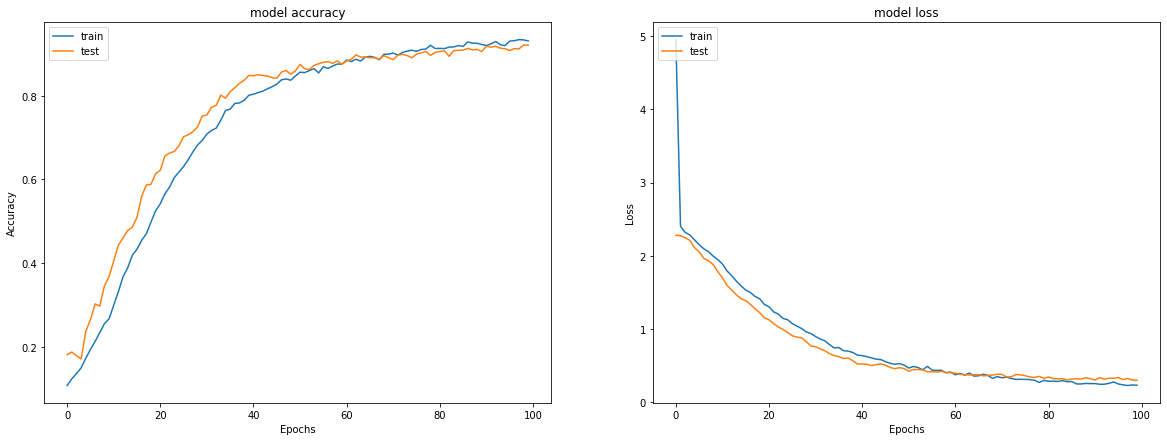

In [33]:
# Performance (Accuracy and Loss) of DNN during the training
plot_performance(dnn_history)

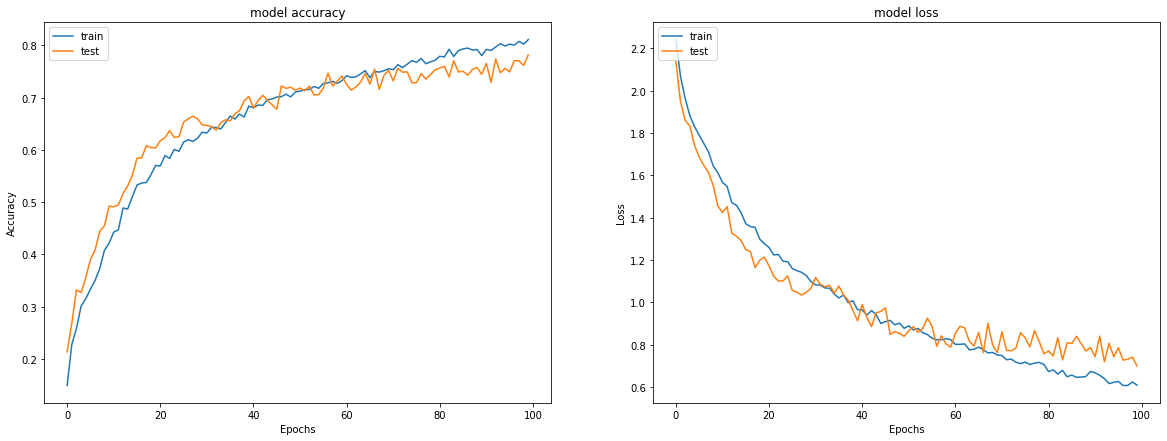

In [34]:
# Performance (Accuracy and Loss) of LSTM during the training
plot_performance(lstm_history)

In [35]:
# Making Predictions on Test data
dnn_predictions = dnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)

In [36]:
dnn_predictions = np.argmax(dnn_predictions, axis=1)
lstm_predictions = np.argmax(lstm_predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

In [37]:
def get_key(val):
    for key, value in labelencoder_name_mapping.items():
        if val == value:
            return key


def mapping(predictions):
    new_list = []
    for i in predictions:
        new_list.append(get_key(i))
    return np.array(new_list)

In [38]:
# Mapping the output with actual label
dnn_predictions = mapping(dnn_predictions)
lstm_predictions = mapping(lstm_predictions)
y_test = mapping(y_test)

In [39]:
class_names = np.unique(dnn_predictions)
class_names

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype='<U16')

In [40]:
# Creating a Confusion Matrix to Evaluate the Model
import seaborn as sns
from sklearn.metrics import *

sns.set(rc={"figure.figsize": (11.7, 8.27)})
dnn_matrix = confusion_matrix(y_test, dnn_predictions, labels=class_names)
lstm_matrix = confusion_matrix(y_test, lstm_predictions, labels=class_names)

In [41]:
dnn_cmtx = pd.DataFrame(
    dnn_matrix,
    index=["true:{:}".format(x) for x in class_names],
    columns=["pred:{:}".format(x) for x in class_names],
)

lstm_cmtx = pd.DataFrame(
    lstm_matrix,
    index=["true:{:}".format(x) for x in class_names],
    columns=["pred:{:}".format(x) for x in class_names],
)

<AxesSubplot:>

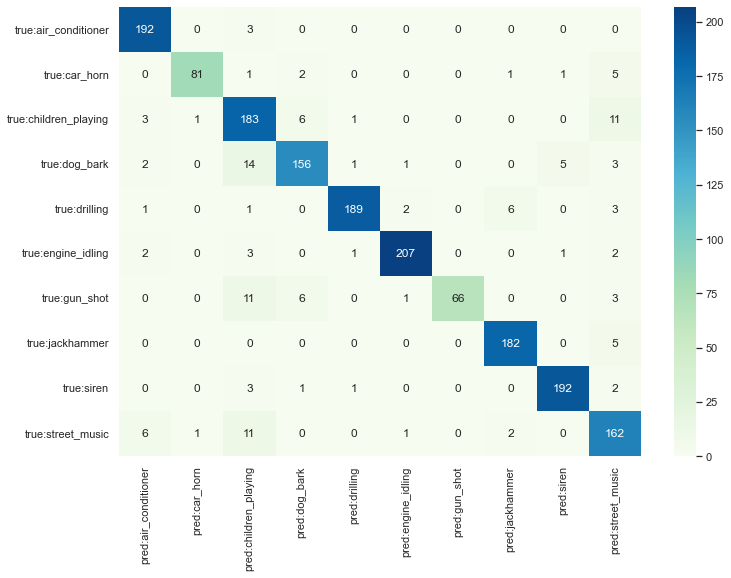

In [42]:
# Confusion Matrix for the Deep Learning Model on Features - MFCC's
sns.heatmap(dnn_cmtx, annot=True, cmap="GnBu", fmt="g")

<AxesSubplot:>

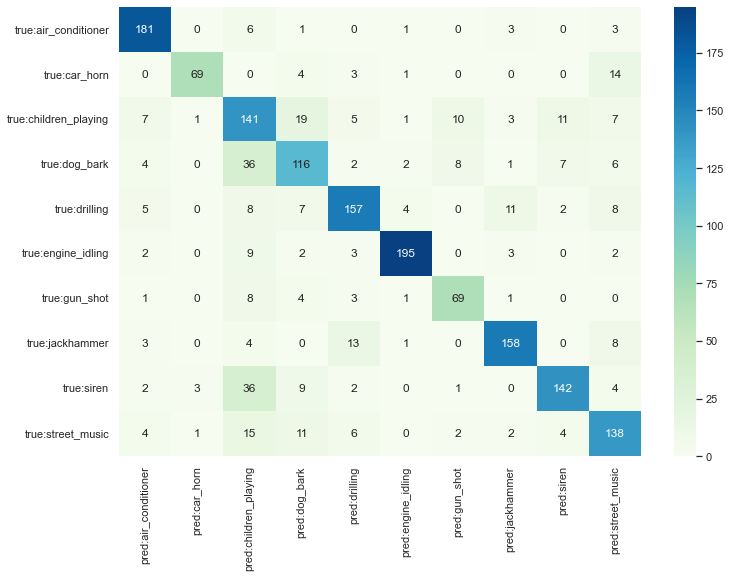

In [43]:
# Confusion Matrix for the LSTM Model on features - MFCC's
sns.heatmap(lstm_cmtx, annot=True, cmap="GnBu", fmt="g")

# Data Preparation for SVM and Random Forest Classfier

As the data input method for these algorithm is different, we need to make sure that the input data is in the format which is accepted by SVM and Random Forest

In [44]:
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [45]:
# Splitting Data into Training and Test
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
# Initializing Random Forest Classifier and SVM
plt.rcParams["figure.figsize"] = (11.7, 8.27)
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
svm_clf = make_pipeline(StandardScaler(), SVC(gamma="auto"))

In [69]:
# Function to Train Models
def run_models(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(
        "Precision of the model is: %.3f"
        % precision_score(y_test, y_pred, average="micro")
    )
    print(
        "Recall of the model is: %.3f" % recall_score(y_test, y_pred, average="macro")
    )
    print("F1 Score of the model: %.3f" % f1_score(y_test, y_pred, average="micro"))
    print(
        "Accuracy of the model on testing data is: %.3f"
        % accuracy_score(y_test, y_pred)
    )
    return np.array(mapping(y_pred))

In [70]:
# Evaluation of Random Forest on Test data
forest_matrix = confusion_matrix(
    mapping(y_test), run_models(forest_clf), labels=class_names
)

Precision of the model is: 0.834
Recall of the model is: 0.814
F1 Score of the model: 0.834
Accuracy of the model on testing data is: 0.834


In [71]:
# Evaluation of SVM on Test data
svm_matrix = confusion_matrix(mapping(y_test), run_models(svm_clf), labels=class_names)

Precision of the model is: 0.891
Recall of the model is: 0.889
F1 Score of the model: 0.891
Accuracy of the model on testing data is: 0.891


In [66]:
forest_cmtx = pd.DataFrame(
    forest_matrix,
    index=["true:{:}".format(x) for x in class_names],
    columns=["pred:{:}".format(x) for x in class_names],
)

svm_cmtx = pd.DataFrame(
    svm_matrix,
    index=["true:{:}".format(x) for x in class_names],
    columns=["pred:{:}".format(x) for x in class_names],
)

<AxesSubplot:>

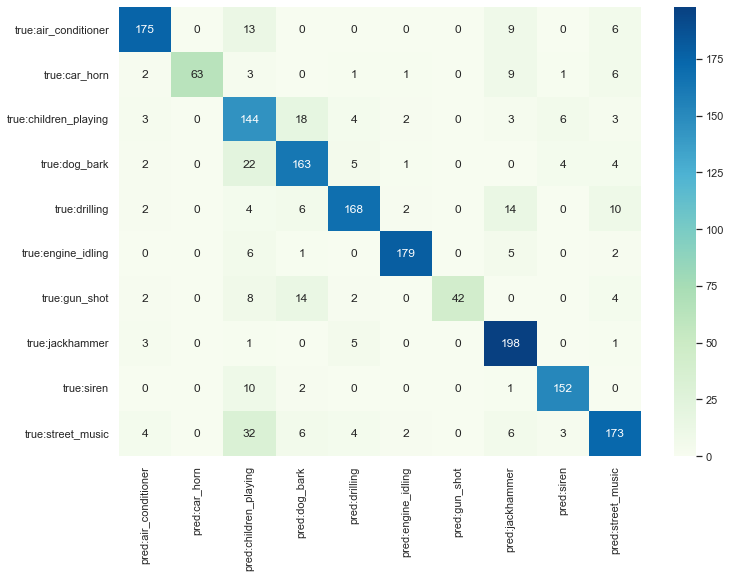

In [67]:
# Confusion Matrix for Random Forest on features - MFCC's
sns.heatmap(forest_cmtx, annot=True, cmap="GnBu", fmt="g")

<AxesSubplot:>

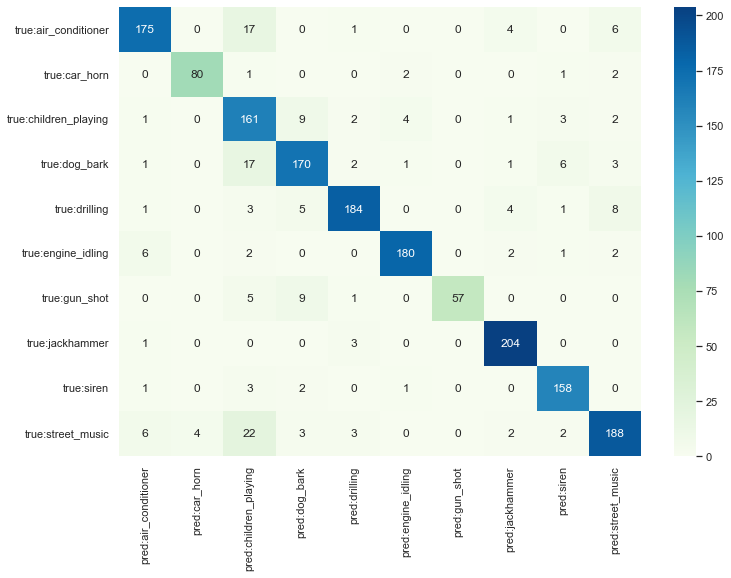

In [68]:
# Confusion Matrix for SVM on features - MFCC's
sns.heatmap(svm_cmtx, annot=True, cmap="GnBu", fmt="g")